In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [36]:
import os
import sqlite3

connection = sqlite3.connect(os.path.join("..", "db.sqlite3"))
cursor = connection.cursor()

query = """
    SELECT *
    FROM restaurant_product
    JOIN restaurant_orderitem ON restaurant_product.id = restaurant_orderitem.product_id
    JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id;
"""

data = pd.read_sql_query(query, connection)
connection.close()

data = data.drop(columns=["id"])
data = data.rename(columns={"name": "product_name", "price": "product_price", "datetime": "order_datetime"})
data.to_csv("restaurant.csv", index=False)

df = pd.read_csv("restaurant.csv")
df["order_datetime"] = pd.to_datetime(df["order_datetime"])

len(df)

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

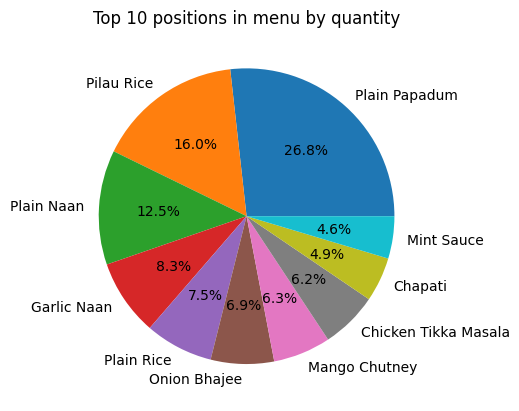

In [37]:
ten_top_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)

plt.pie(ten_top_products, labels=ten_top_products.index, autopct="%1.1f%%")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

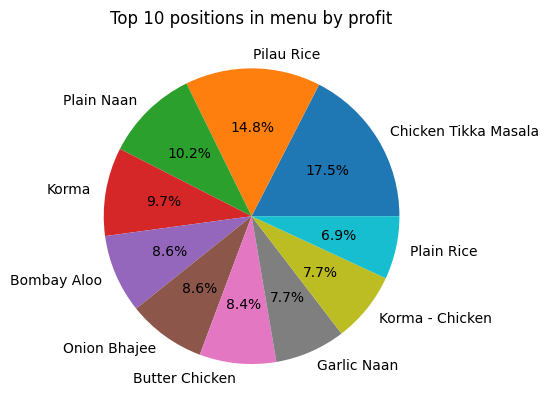

In [39]:
df["item_price"] = df["product_price"] * df["quantity"]

ten_top_products_price = df.groupby("product_name")["item_price"].sum().sort_values(ascending=False).head(10)

plt.pie(ten_top_products_price, labels=ten_top_products_price.index, autopct="%1.1f%%")
plt.title("Top 10 positions in menu by profit")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

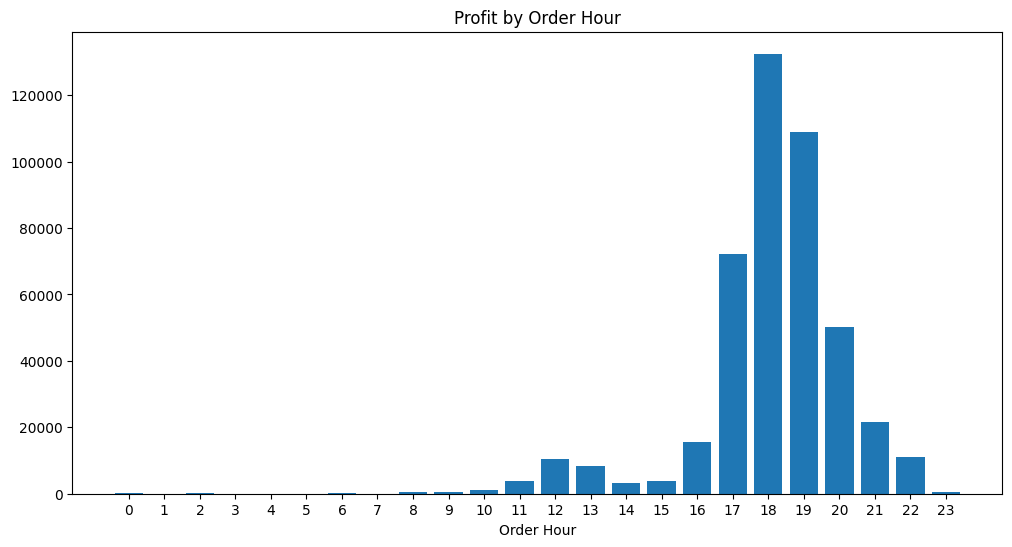

In [40]:
df["order_hour"] = df["order_datetime"].dt.hour

income = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(12, 6))
plt.bar(income.index, income)
plt.xlabel("Order Hour")
plt.title("Profit by Order Hour")
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

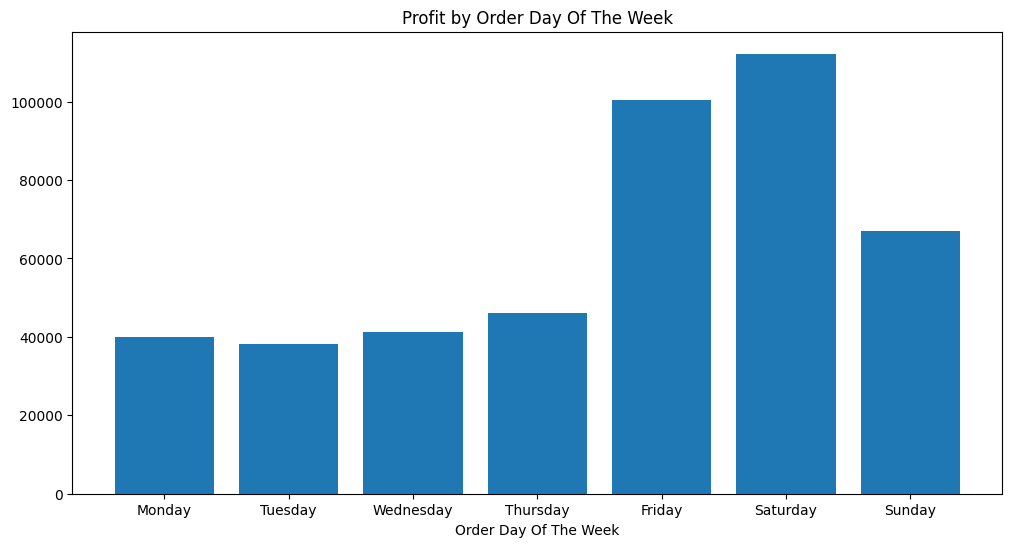

In [41]:
df["order_week_day"] = df["order_datetime"].dt.dayofweek

daily_income = df.groupby("order_week_day")["item_price"].sum()

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 6))
plt.bar(days_of_week, daily_income)
plt.xlabel("Order Day Of The Week")
plt.title("Profit by Order Day Of The Week")
plt.show()